In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Loading Dataset

In [2]:
dataset = pd.read_csv("C:/Users/SANDY/Desktop/DATA ANALYSIS FILES - JULY 2024/CognoRise DS Internship Oct 2024/3. TITANIC SURVIVAL PREDICTION PROJECT/tested.csv")

In [3]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Exploratory Data Analysis (EDA)

In [6]:
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# Plot survival counts

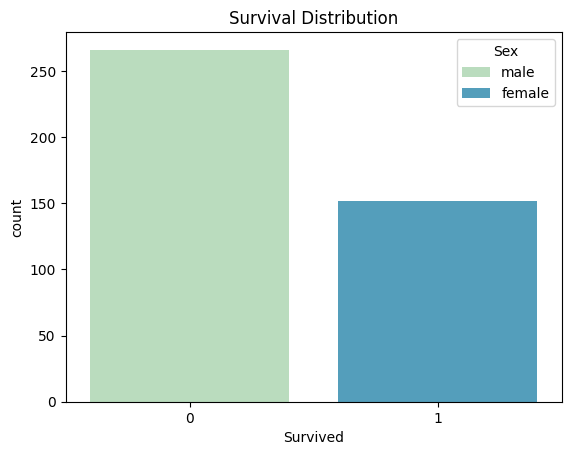

In [8]:
sns.countplot(x="Survived", hue="Sex", data=dataset, palette="GnBu")
plt.title("Survival Distribution")
plt.show()

# Plot survival by gender

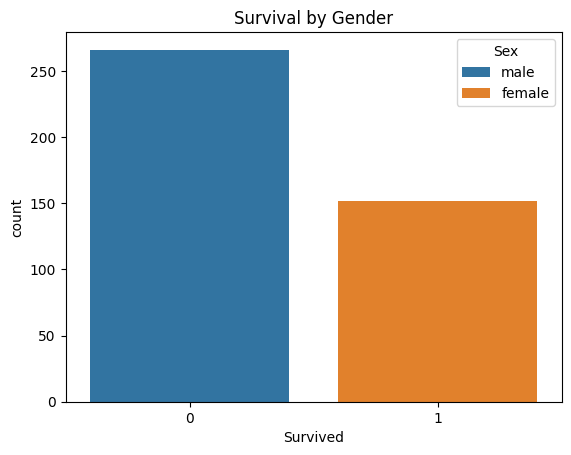

In [10]:
sns.countplot(x="Survived", hue="Sex", data=dataset)
plt.title("Survival by Gender")
plt.show()

# Age distribution

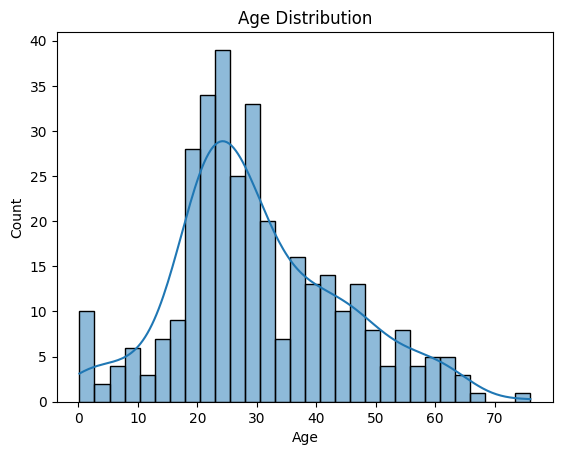

In [11]:
sns.histplot(dataset["Age"].dropna(), bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Data Preprocessing
Fill missing 'Age' with the median

In [12]:
dataset["Age"].fillna(dataset["Age"].median(), inplace=True)

C:\Users\SANDY\AppData\Local\Temp\ipykernel_13292\1705702745.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset["Age"].fillna(dataset["Age"].median(), inplace=True)


Fill missing 'Embarked' with the most common port

In [14]:
dataset["Embarked"].fillna(dataset["Embarked"].mode(), inplace=True)

Drop the 'Cabin' column due to high percentage of missing values

In [19]:
dataset.drop("Cabin", axis=1, inplace=True)

Drop the 'Ticket' and 'Name' columns as they are not useful for prediction

In [20]:
dataset.drop(["Ticket", "Name"], axis=1, inplace=True)

Convert categorical variables to numeric

In [25]:
le = LabelEncoder()
dataset["Sex"] = le.fit_transform(dataset["Sex"])
dataset["Embarked"] = le.fit_transform(dataset["Embarked"])

# Feature Selection and Scaling

Define the features and target variable

In [29]:
X = dataset.drop("Survived", axis=1)
y = dataset["Survived"]

In [44]:
X = X.fillna(X.median())

Split data into train and test sets

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [46]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training

Train a Logistic Regression model

In [50]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
y_pred_logreg

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

Train a Decision Tree Classifier

In [51]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
y_pred_tree

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

Train a Random Forest Classifier

In [53]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
y_pred_forest

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1])

# Model Evaluation

Define a function to evaluate the models

In [54]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"Model Evaluation for {model_name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("\n")

# Evaluate Logistic Regression

In [55]:
evaluate_model(y_test, y_pred_logreg, "Logistic Regression")

Model Evaluation for Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84





# Evaluate Decision Tree

In [56]:
evaluate_model(y_test, y_pred_tree, "Decision Tree")

Model Evaluation for Decision Tree
Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84





# Evaluate Random Forest

In [57]:
evaluate_model(y_test, y_pred_forest, "Random Forest")

Model Evaluation for Random Forest
Accuracy: 1.0
Confusion Matrix:
 [[50  0]
 [ 0 34]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84





# Feature Importance

Plot feature importances for Random Forest

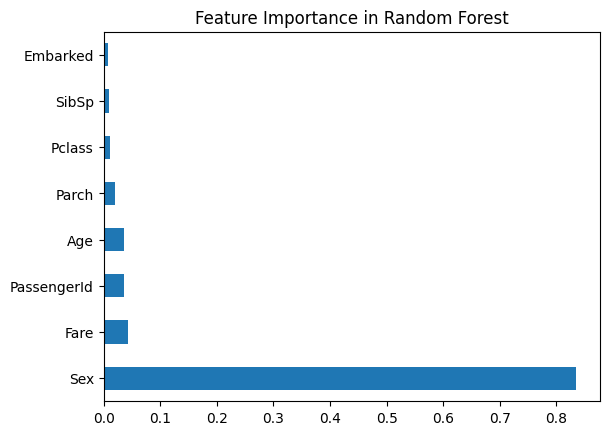

In [ ]:
feature_importances = pd.Series(forest.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()